**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer


### **Load Data**

In [2]:
df = pd.read_csv("heart_disease_uci.csv")

### **Explore Data**

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
df.shape

(920, 16)

In [7]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [8]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [9]:
df.isnull().any()

id          False
age         False
sex         False
dataset     False
cp          False
trestbps     True
chol         True
fbs          True
restecg      True
thalch       True
exang        True
oldpeak      True
slope        True
ca           True
thal         True
num         False
dtype: bool

### **Renaming num to Target for clear understanding**

In [10]:
#renaming target column to target
df.rename(columns={'num': 'target'}, inplace=True)
# convert target to binary
df['target']=df['target'].apply(lambda x: 1 if x > 0 else 0)
df['target'].head(10)

0    0
1    1
2    1
3    0
4    0
5    0
6    1
7    0
8    1
9    1
Name: target, dtype: int64

### **Handling Missing Values**

In [11]:
# selecting numerical cols
numerical_cols = df.select_dtypes(include = ['int64', 'float64']).columns
# selecting categorical cols
categorical_cols = df.select_dtypes(include = ['object']).columns

In [12]:
# create imputer for numeric and categorical cols
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')


df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
#Dataset now has no missing values

In [13]:
categorical_col =  df.select_dtypes(include=['object']).columns
print(categorical_col)

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [14]:
# Drop useless columns
df.drop(columns=['id'], inplace=True)
df.drop(columns=['dataset'], inplace=True)

### **Encoding Categorical Columns**

In [15]:
# Label Encoding for ordinal columns
label_encoder = LabelEncoder()
ordinal_cols = ['sex', 'fbs', 'exang']
for col in ordinal_cols:
    df[col] = label_encoder.fit_transform(df[col])
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [16]:
#One Hot Encoding
one_hot = ['cp', 'restecg', 'slope', 'thal']
df = pd.get_dummies(df, columns=one_hot, drop_first=True)


### **Feature Scaling**

In [17]:
# Separate Features and Target
X = df.drop('target', axis=1)
y = df['target']

In [18]:
#minmax scaling (bring values between 0 and 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### **Splitting the data**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

**Check if Data is balanced or not**

target
1.0    509
0.0    411
Name: count, dtype: int64


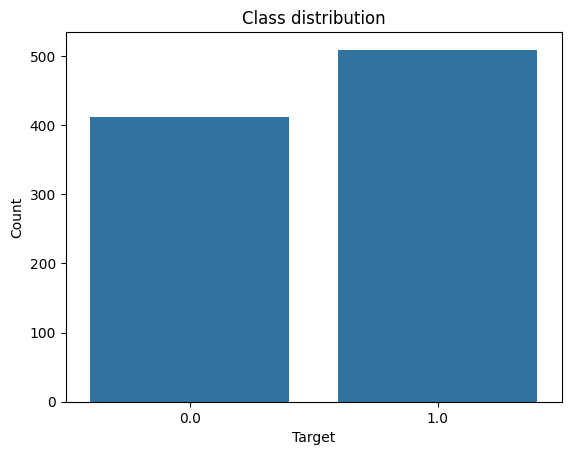

In [20]:
print(df['target'].value_counts())

sns.countplot(x=df['target'],data=df)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title("Class distribution")
plt.show()

### **Building the Model**

### Random Forest Classifier

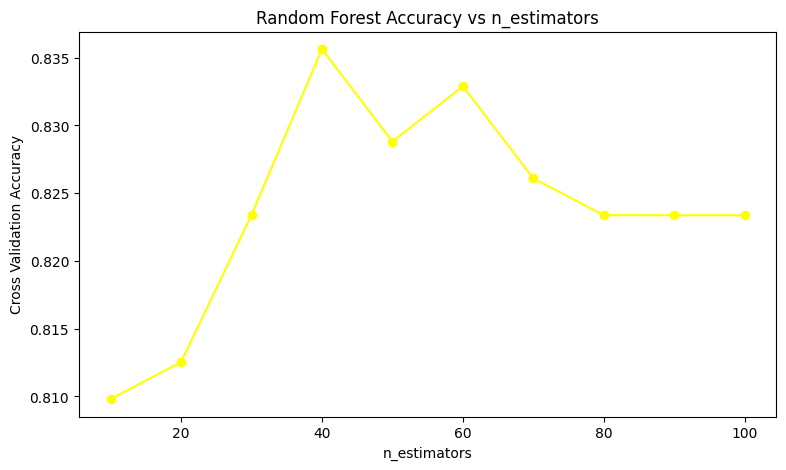

Best n_estimator value is  40


In [21]:
# Find best number of estimators using cross-validation
forest_scores=[]
n_range = range(10,101,10)

for i in n_range:
    classifier = RandomForestClassifier(n_estimators=i, random_state=0)
    cross_value_score = cross_val_score(classifier, X_train, y_train, cv=5)
    forest_scores.append(cross_value_score.mean())


plt.figure(figsize = (9,5))
plt.plot(n_range, forest_scores, marker='o', color='yellow')
plt.xlabel('n_estimators')
plt.ylabel('Cross Validation Accuracy')
plt.title('Random Forest Accuracy vs n_estimators')
plt.show()


# pick the best score
best_n = n_range[forest_scores.index(max(forest_scores))]
print("Best n_estimator value is ",best_n)



### Fitting Model on the best accuracy number

In [22]:
model = RandomForestClassifier(n_estimators=best_n, random_state=0)
model.fit(X_train, y_train)

,n_estimators,40
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
predictions = model.predict(X_test)

print("Accuracy of the model is : ", round(accuracy_score(y_test, predictions) * 100, 2), "%")
print("\nConfusion Matrix ", confusion_matrix(y_test, predictions))
print("\nClassification report ",classification_report(y_test, predictions))

Accuracy of the model is :  82.61 %

Confusion Matrix  [[60 20]
 [12 92]]

Classification report                precision    recall  f1-score   support

         0.0       0.83      0.75      0.79        80
         1.0       0.82      0.88      0.85       104

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.82       184



### KNN Classifier Model

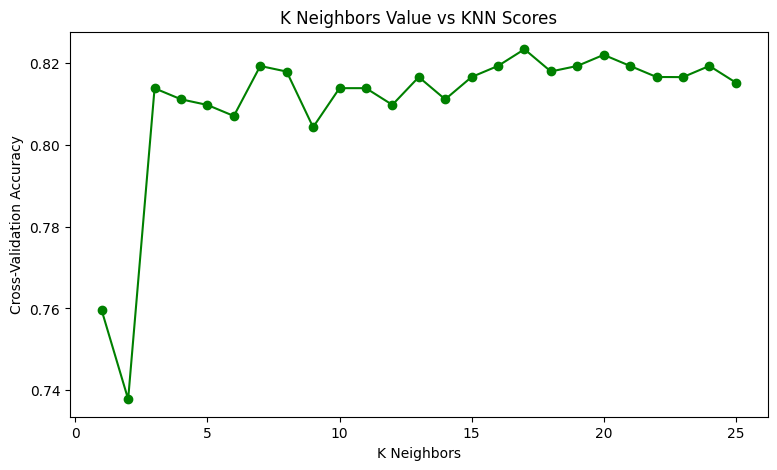

Best value for k is: 17


In [24]:
knn_scores = []
n_range = range(1, 26)

for i in n_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    cross_val = cross_val_score(knn, X_train, y_train, cv=5)
    knn_scores.append(cross_val.mean())

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(n_range, knn_scores, marker='o', color='green')
plt.title("K Neighbors Value vs KNN Scores")
plt.xlabel('K Neighbors')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

# Picking the best score
best_k = n_range[knn_scores.index(max(knn_scores))]
print("Best value for k is:", best_k)


In [25]:
k_model = KNeighborsClassifier(n_neighbors=best_k)
k_model.fit(X_train, y_train)

,n_neighbors,17
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [26]:
predictions_with_k = k_model.predict(X_test)

print("Accuracy with KNN ", round(accuracy_score(predictions_with_k, y_test)*100,2) , "%")
print("\nConfusion Matrix ", confusion_matrix(y_test, predictions_with_k))
print("\nClassification report ",classification_report(y_test, predictions_with_k))

Accuracy with KNN  80.98 %

Confusion Matrix  [[56 24]
 [11 93]]

Classification report                precision    recall  f1-score   support

         0.0       0.84      0.70      0.76        80
         1.0       0.79      0.89      0.84       104

    accuracy                           0.81       184
   macro avg       0.82      0.80      0.80       184
weighted avg       0.81      0.81      0.81       184



### Logistic Regression

In [27]:
logistic_reg = LogisticRegression(max_iter=10000)
logistic_reg.fit(X_train, y_train)

predictions_with_logistic_reg = logistic_reg.predict(X_test)

print("Accuracy with logistic regression is ", round(accuracy_score(y_test, predictions_with_logistic_reg)*100,2),"%")

Accuracy with logistic regression is  76.09 %
